In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
%matplotlib inline
def extract_log(log_path):
    logs = []
    with open(log_path) as f:
        for line in f.readlines():
            if line.startswith('epoch'):
                line = line.strip()
                fields = line.split(',')
                log = [float(field.split(':')[1].strip()) for field in fields]
                logs.append(log)
    return logs

def get_cmap(N):
    color_norm  = colors.Normalize(vmin=0, vmax=N)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

In [2]:
log = np.array(extract_log('../exps/keepfloat/log'))
train_float_loss = [log[i, 1] for i in range(len(log[:, 1])) if i % 2 == 0]
val_float_loss = [log[i, 1] for i in range(len(log[:, 1])) if i % 2 == 1]
train_2bits_loss = [log[i, 2] for i in range(len(log[:, 2])) if i % 2 == 0]
val_2bits_loss = [log[i, 2] for i in range(len(log[:, 2])) if i % 2 == 1]
train_4bits_loss = [log[i, 3] for i in range(len(log[:, 3])) if i % 2 == 0]
val_4bits_loss = [log[i, 3] for i in range(len(log[:, 3])) if i % 2 == 1]
train_6bits_loss = [log[i, 4] for i in range(len(log[:, 4])) if i % 2 == 0]
val_6bits_loss =[log[i, 4] for i in range(len(log[:, 4])) if i % 2 == 1]
train_8bits_loss = [log[i, 5] for i in range(len(log[:, 5])) if i % 2 == 0]
val_8bits_loss =[log[i, 5] for i in range(len(log[:, 5])) if i % 2 == 1]

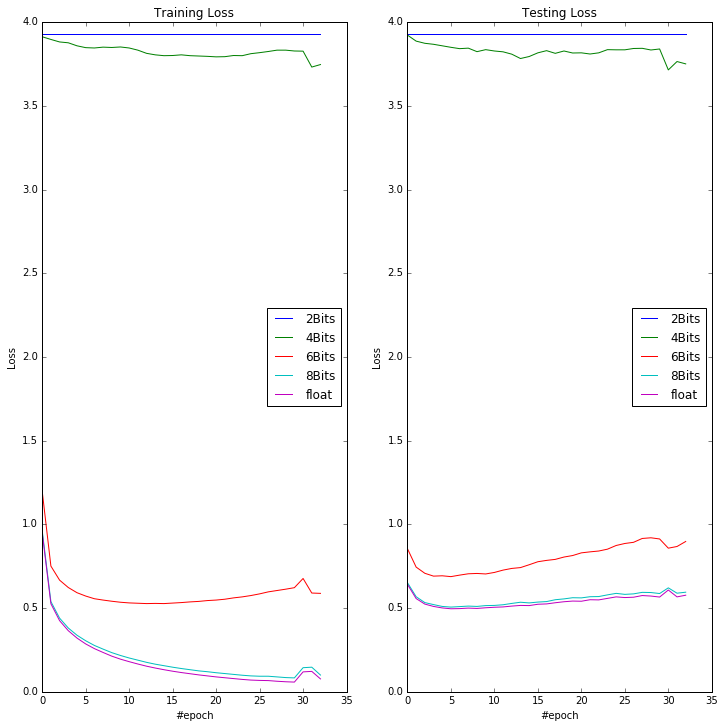

In [3]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(train_2bits_loss, label='2Bits')
ax1.plot(train_4bits_loss, label='4Bits')
ax1.plot(train_6bits_loss, label='6Bits')
ax1.plot(train_8bits_loss, label='8Bits')
ax1.plot(train_float_loss, label='float')
ax1.set_xlabel('#epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.legend(loc='best')

ax2.plot(val_2bits_loss, label='2Bits')
ax2.plot(val_4bits_loss, label='4Bits')
ax2.plot(val_6bits_loss, label='6Bits')
ax2.plot(val_8bits_loss, label='8Bits')
ax2.plot(val_float_loss, label='float')

ax2.set_xlabel('#epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Testing Loss')
ax2.legend(loc='best')

plt.savefig('../vis/keepfloat.eps')
plt.show()